# **Comparative Analysis of BERT-Based and Large Language Models for Detecting Suicidal Ideation: A Performance Evaluation Study**

**Authors:**
*   Adonias Caetano de Oliveira
*   Renato Freitas Bessa
*   João Pedro Cavalcanti Azevedo
*   Francisco José Silva e Silva
*   Silmar Silva Teixeira
*   Ariel Soares Teles

Source code adapted from https://www.intodeeplearning.com/bert-multiclass-text-classification/



**This version has:**

*   Pre-processing of texts
*   stopword removal
*   Dataset balancing
*   Data augmentation
*   fixed datasets for training and test
*   BERTimbau-Base

In [ ]:
# mount it
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install Unidecode

In [ ]:
!pip install wordcloud

In [ ]:
#hide
!pip install transformers

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#text preprocessing libraries
import pandas as pd
import re
from unidecode import unidecode
from string import punctuation
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.corpus import stopwords

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
#text classification libraries
from transformers import BertTokenizer, BertForSequenceClassification
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

## **Loading data**

**Loading training dataset**

In [ ]:
url = 'dataset available in https://zenodo.org/records/10070747' # CSV file public link via Google Drive
file_id = url.split('/')[-2]
read_url='https://drive.google.com/uc?id=' + file_id

# read the data
data_train = pd.read_csv(read_url, index_col=0)

# display the first 5 rows
data_train.head()

,text,target
72,Você está triste e cansado de viver a vida em ...,0.0
73,E eu to tão cansado de viver longe das pessoas...,0.0
74,cansado de viver uma vida baseada em estações,0.0
76,atenção jovens deem o banco para os idosos se ...,0.0
78,Um dia você ta brincando com seus brinquedos j...,0.0


In [ ]:
url = 'dataset available in https://zenodo.org/records/10070747' # CSV file public link via Google Drive
file_id = url.split('/')[-2]
read_url='https://drive.google.com/uc?id=' + file_id

# read the data
data_test = pd.read_csv(read_url, index_col=0)

# display the first 5 rows
data_test.head()

,text,target
0,Aquela vontade de acabar com a minha vida voltou,1
1,to triste e com vontade de acabar com a minha ...,1
2,Corinthians ta querendo acabar com minha vida ...,0
3,Alguém poderia por favor me dar um tiro a acab...,1
4,TAYLOR TU VAI acabar com a minha vida MULHER,0


## **Data pre-processing**

In [ ]:
nltk.download('rslp')
nltk.download('stopwords')
stopwords_list = stopwords.words("portuguese")
print(stopwords_list)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data_process_train = data_train.copy()
data_process_test = data_test.copy()

In [ ]:
def process_data(data_process):
  old_texts = data_process["text"]
  new_texts = []

  for text in old_texts:
    text = text.lower()
    text = re.sub('@[^\s]+', '', text)
    text = unidecode(text)
    text = re.sub('<[^<]+?>','', text)
    text = ''.join(c for c in text if not c.isdigit())
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text)
    text = ''.join(c for c in text if c not in punctuation)
    text = ' '.join([word for word in text.split() if word not in stopwords_list])
    text = ''.join(text.replace("\"", ""))
    text = ''.join(text.replace("'", ""))
    new_texts.append(text)

  return new_texts

In [ ]:
data_process_train['text'] = process_data(data_process_train)
data_process_test['text'] = process_data(data_process_test)

## **Dataset balancing**

<Axes: xlabel='target', ylabel='count'>

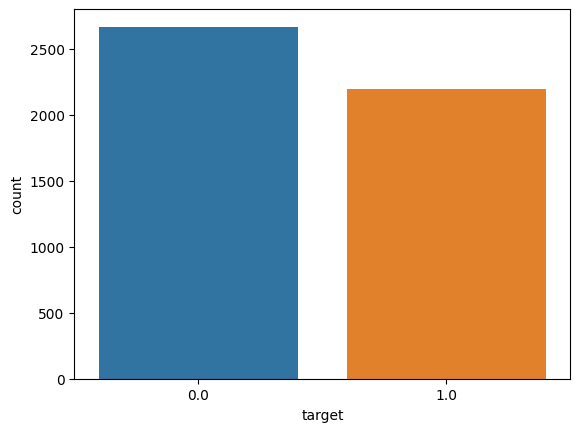

In [ ]:
sns.countplot(x = data_process_train['target'])

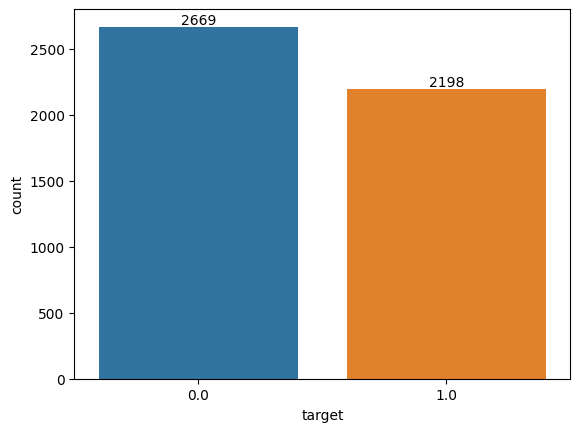

In [ ]:
import matplotlib.pyplot as plt

ax = sns.countplot(x=data_process_train['target'])
for label in ax.containers:
    ax.bar_label(label)
plt.show()

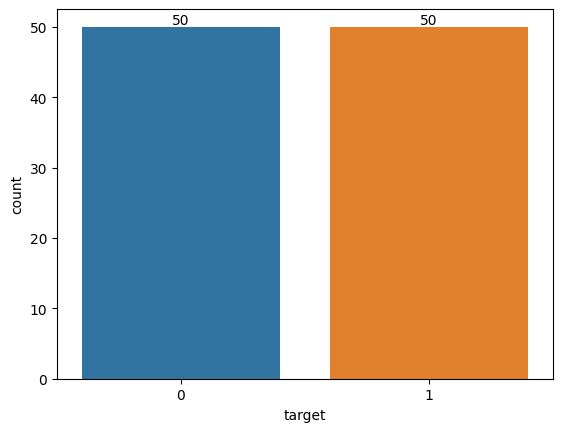

In [ ]:
import matplotlib.pyplot as plt

ax = sns.countplot(x=data_process_test['target'])
for label in ax.containers:
    ax.bar_label(label)
plt.show()

<Axes: xlabel='target', ylabel='count'>

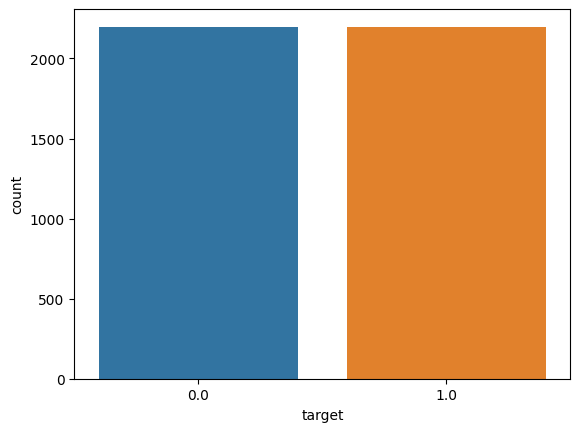

In [ ]:
rus = RandomUnderSampler(random_state= 0)
X_bal, Y_bal = rus.fit_resample(data_process_train[['text']], data_process_train['target'])
sns.countplot(x = Y_bal)

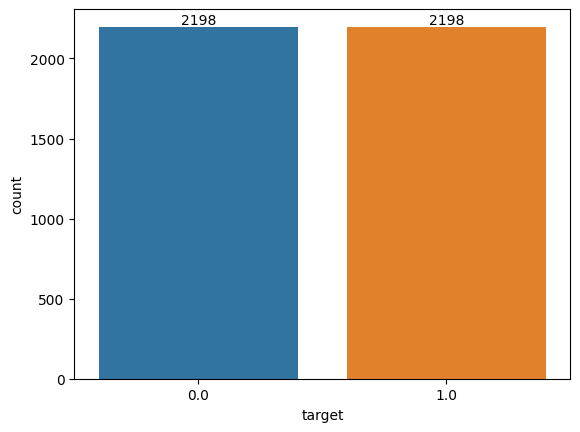

In [ ]:
import matplotlib.pyplot as plt

ax = sns.countplot(x=Y_bal)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

## **Words cloud**

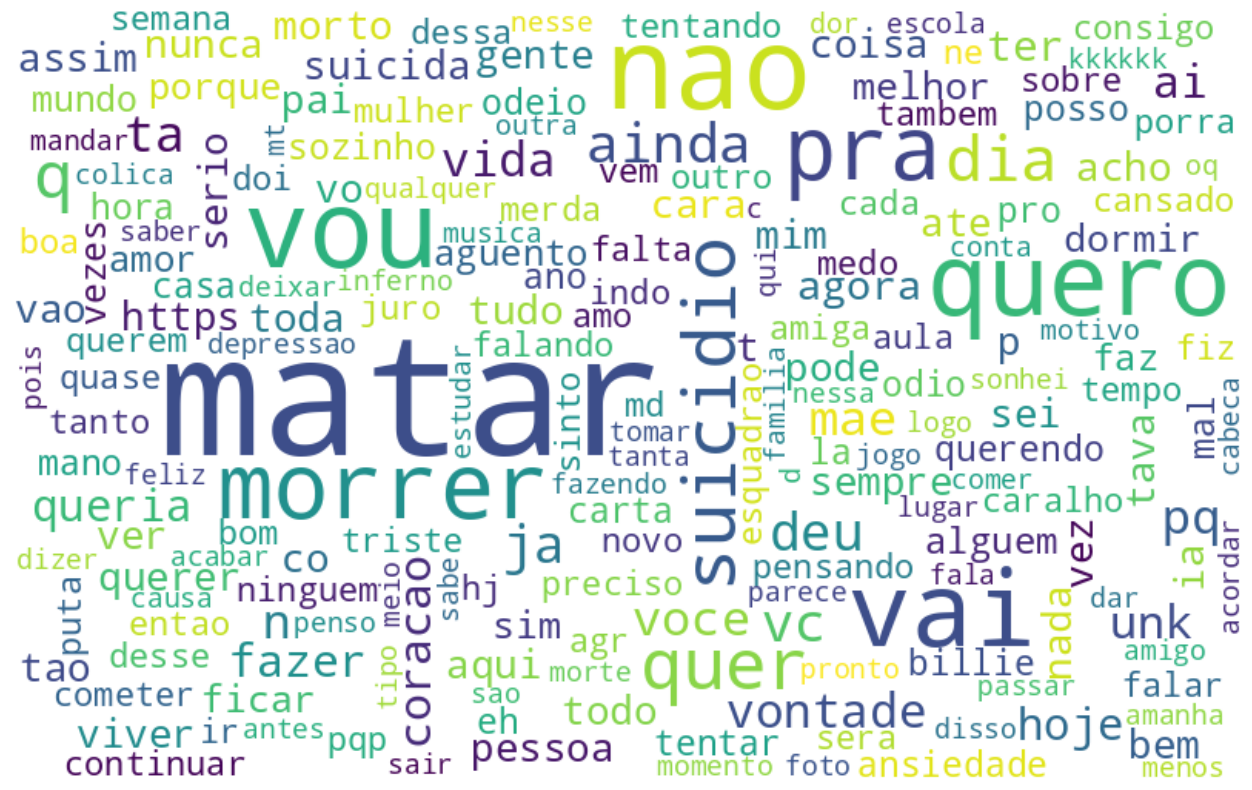

In [ ]:
new_texts = data_process_train["text"]
all_words = ' '.join([text for text in new_texts])
word_cloud = WordCloud(width= 800, height= 500, max_font_size = 110, background_color="white", collocations = False).generate(all_words)
plt.figure(figsize=(20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

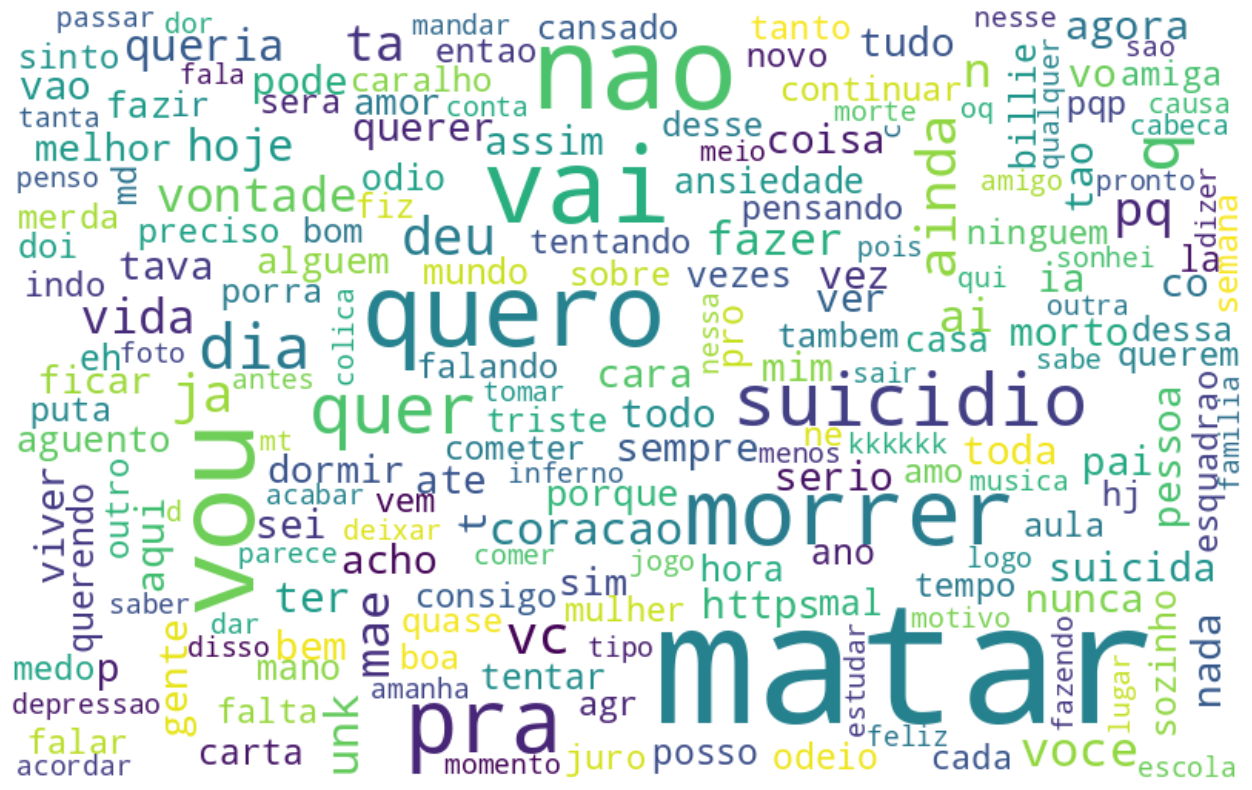

In [ ]:
df_positives = data_process_train[data_process_train['target'] == 1]
new_texts_positives = df_positives["text"]
all_words = ' '.join([text for text in new_texts])
word_cloud = WordCloud(width= 800, height= 500, max_font_size = 110, background_color="white", collocations = False).generate(all_words)
plt.figure(figsize=(20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

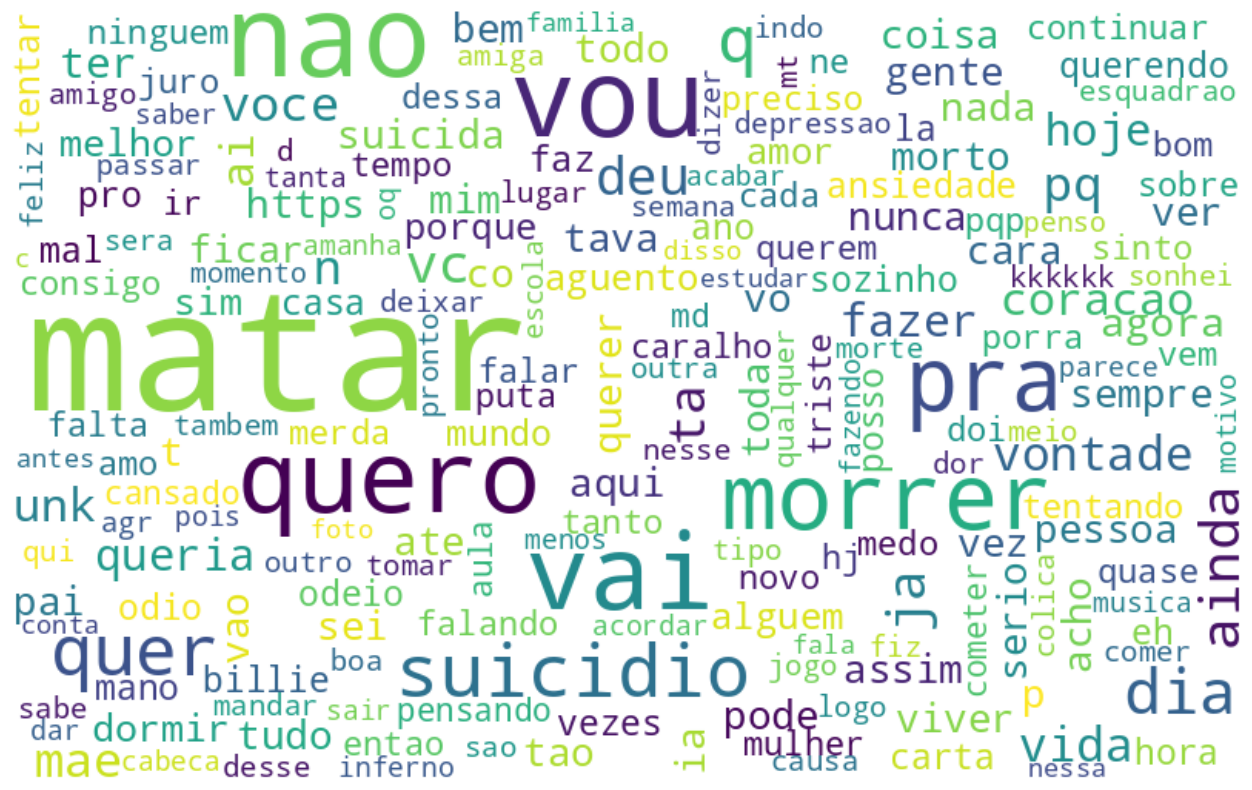

In [ ]:
df_negatives = data_process_train[data_process_train['target'] == 0]
new_texts_positives = df_negatives["text"]
all_words = ' '.join([text for text in new_texts])
word_cloud = WordCloud(width= 800, height= 500, max_font_size = 110, background_color="white", collocations = False).generate(all_words)
plt.figure(figsize=(20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## **Cross validation: Hold-Out**

In [ ]:
train_df = X_bal
train_label = Y_bal

In [ ]:
test_df = data_process_test[['text']].copy()
test_label = data_process_test[['target']].copy()

## Tokenization

Tokenization is a process for spliting raw texts into tokens, and encoding the tokens into numeric data.

To do this, we first initialize a `BertTokenizer`:

In [ ]:
PRETRAINED_LM = 'neuralmind/bert-base-portuguese-cased' # BERT Base
tokenizer = BertTokenizer.from_pretrained(PRETRAINED_LM, do_lower_case=True)
tokenizer

BertTokenizer(name_or_path='neuralmind/bert-base-portuguese-cased', vocab_size=29794, model_max_length=1000000000000000019884624838656, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

define a function for encoding:

In [ ]:
def encode(docs):
    '''
    This function takes list of texts and returns input_ids and attention_mask of texts
    '''
    encoded_dict = tokenizer.batch_encode_plus(docs, add_special_tokens=True, max_length=128, padding='max_length',
                            return_attention_mask=True, truncation=True, return_tensors='pt')
    input_ids = encoded_dict['input_ids']
    attention_masks = encoded_dict['attention_mask']
    return input_ids, attention_masks

Use the `ecode` function to get input ids and attention masks of the datasets:

In [ ]:
train_input_ids, train_att_masks = encode(train_df['text'].values.tolist())
test_input_ids, test_att_masks = encode(test_df['text'].values.tolist())

<br>

## Creating `Dataset`s and `DataLoader`s

We'll use pytorch `Dataset` and `DataLoader` to split data into batches. For more detatils, you can check out another post on [DataLoader](https://www.intodeeplearning.com/how-to-load-datasets-from-hugging-face-datasets/).

Turn the labels into tensors:

In [ ]:
import torch
train_y = torch.LongTensor(train_label.values)
test_y = torch.LongTensor(test_label.values)
train_y.size(),test_y.size()

(torch.Size([4396]), torch.Size([100, 1]))

Create dataloaders for training

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

BATCH_SIZE = 16
train_dataset = TensorDataset(train_input_ids, train_att_masks, train_y)
train_sampler = RandomSampler(train_dataset)
train_dataloader = DataLoader(train_dataset, sampler=train_sampler, batch_size=BATCH_SIZE)

test_dataset = TensorDataset(test_input_ids, test_att_masks, test_y)
test_sampler = SequentialSampler(test_dataset)
test_dataloader = DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)

<br>

## Bert For Sequence Classification Model

We will initiate the  `BertForSequenceClassification ` model from Huggingface, which allows easily fine-tuning the pretrained BERT mode for classification task.


You will see a warning that some parts of the model are randomly initialized. This is normal since the classification head has not yet been trained.

In [ ]:
train_label.unique()

array([0., 1.])

In [ ]:
from transformers import BertForSequenceClassification
N_labels = len(train_label.unique())
model = BertForSequenceClassification.from_pretrained(PRETRAINED_LM,
                                                      num_labels=N_labels,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at neuralmind/bert-base-portuguese-cased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
model = model.cuda()

<br>

## Fine-tuning

### **Optimizer and Scheduler**

An **optimizer** is for tuning parameters in the model, which is set up with a learning rate.

Selection of the learning rate is important. In practice, it's common to use a **scheduler** to decrease the learning rate during training.

In [ ]:
from torch.optim import AdamW
from transformers import get_linear_schedule_with_warmup

# Best results: 07 and 08
EPOCHS = 7
LEARNING_RATE = 2e-6

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)
scheduler = get_linear_schedule_with_warmup(optimizer,
             num_warmup_steps=0,
            num_training_steps=len(train_dataloader)*EPOCHS )

<br>

### **Training Loop**

The training loop is where the magic of deep learning happens. The model will be fine-tuned on the emotion dataset for classification task.

In [ ]:
#collapse-output
from torch.nn.utils import clip_grad_norm_
from tqdm.notebook import tqdm
import numpy as np
import math

train_loss_per_epoch = []
val_loss_per_epoch = []


for epoch_num in range(EPOCHS):
    print('Epoch: ', epoch_num + 1)
    '''
    Training
    '''
    model.train()
    train_loss = 0
    for step_num, batch_data in enumerate(tqdm(train_dataloader,desc='Training')):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

        loss = output.loss
        train_loss += loss.item()

        model.zero_grad()
        loss.backward()
        del loss

        clip_grad_norm_(parameters=model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()

    train_loss_per_epoch.append(train_loss / (step_num + 1))


    '''
    Loss message
    '''
    print("{0}/{1} train loss: {2} ".format(step_num+1, math.ceil(len(train_df) / BATCH_SIZE), train_loss / (step_num + 1)))

Epoch:  1


Training:   0%|          | 0/275 [00:00<?, ?it/s]

275/275 train loss: 0.6003103524988348 
Epoch:  2


Training:   0%|          | 0/275 [00:00<?, ?it/s]

275/275 train loss: 0.4161167058619586 
Epoch:  3


Training:   0%|          | 0/275 [00:00<?, ?it/s]

275/275 train loss: 0.3393443784388629 
Epoch:  4


Training:   0%|          | 0/275 [00:00<?, ?it/s]

275/275 train loss: 0.2971172086488117 
Epoch:  5


Training:   0%|          | 0/275 [00:00<?, ?it/s]

275/275 train loss: 0.2695648350905288 
Epoch:  6


Training:   0%|          | 0/275 [00:00<?, ?it/s]

275/275 train loss: 0.25646082810380244 
Epoch:  7


Training:   0%|          | 0/275 [00:00<?, ?it/s]

275/275 train loss: 0.2504495359686288 


You can see in the output that the training losses steadily decreases in each epoch.

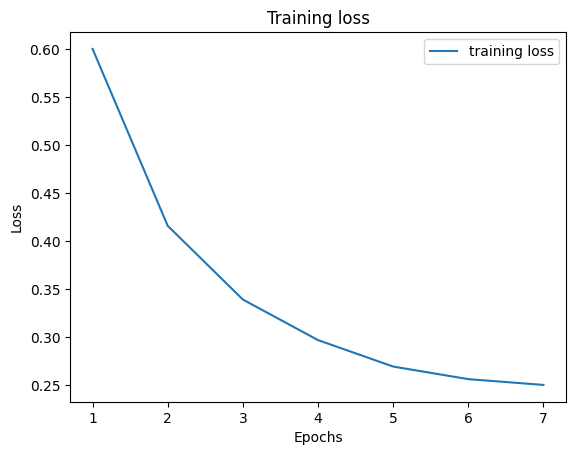

In [ ]:
from matplotlib import pyplot as plt
epochs = range(1, EPOCHS +1 )
fig, ax = plt.subplots()
ax.plot(epochs,train_loss_per_epoch,label ='training loss')
ax.set_title('Training loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend()
plt.show()

## Performance Metrics
It's common to use precision, recall, and F1-score as the performance metrics.

In [ ]:
label_names = ['negative', 'positive']
label_names

['negative', 'positive']

## Error Analysis
With the predictions, we can plot the confusion matrix:

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels=None):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
  plt.title("Normalized confusion matrix")
  plt.show()

## **Prediction**

*Now* let's use the trained model to predict the testing set.



In [ ]:
model.eval()
test_pred = []
test_loss= 0
with torch.no_grad():
    for step_num, batch_data in tqdm(enumerate(test_dataloader)):
        input_ids, att_mask, labels = [data.to(device) for data in batch_data]
        output = model(input_ids = input_ids, attention_mask=att_mask, labels= labels)

        loss = output.loss
        test_loss += loss.item()

        test_pred.append(np.argmax(output.logits.cpu().detach().numpy(),axis=-1))
test_pred = np.concatenate(test_pred)

0it [00:00, ?it/s]

In [ ]:
from sklearn.metrics import classification_report

print('classifiation report')
print(classification_report(test_pred, test_label.to_numpy(),target_names=label_names))

classifiation report
              precision    recall  f1-score   support

    negative       0.92      0.96      0.94        48
    positive       0.96      0.92      0.94        52

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



With the predictions, we can plot the confusion matrix again:

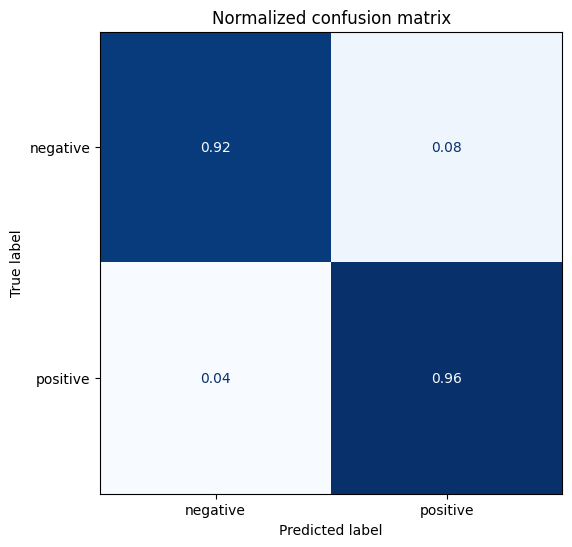

In [ ]:
plot_confusion_matrix(test_pred,test_label.to_numpy(),labels=label_names)

Output the misclassified text:

In [ ]:
test_df['pred'] = test_pred
test_df['label'] = test_label
test_df.reset_index(level=0)
print(test_df[test_df['label']!=test_df['pred']].shape)
test_df[test_df['label']!=test_df['pred']][['text','label','pred']].head(10)

(6, 3)


,text,label,pred
7,slides p estudar obg faculdade acabar vida social,0,1
33,hj h mae bate deixando machucada ameaca apenas...,1,0
38,maravilha pai vai tirar celular novo psicologi...,1,0
39,saber louco bira pode acabar vida simples gest...,0,1
44,matheus kauan acabar vida agora,0,1
48,objetivo yuri ontem role acabar vida so,0,1


## **Saving results**

In [ ]:
import shutil

In [ ]:
#hide
test_df.to_csv("test_results_BERTimbauBase.csv",index= False)

In [ ]:
shutil.copy('/content/test_results_BERTimbauBase.csv', '/content/drive/MyDrive/test_results_BERTimbauBase.csv')

'/content/drive/MyDrive/test_results_BERTimbauBase.csv'

In [ ]:
MODEL_PATH = "BERTimbauBase.bin"
torch.save(model.state_dict(), MODEL_PATH)

In [ ]:
shutil.copy('/content/BERTimbauBase.bin', '/content/drive/MyDrive/BERTimbauBase.bin')

'/content/drive/MyDrive/BERTimbauBase.bin'

In [ ]:
from google.colab import output
output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')